Contact: 

- Hernandez A., Ivan

  Computer System Engineer 

  ihernandeza123@gmail.com



- Sepulveda F., Salome

  Std Master of Big Data
  
  salome.sepulveda.fontaine@gmail.com



# Abstract


*During the pandemic declared due to Covid-19 our lifestyle changed. From personal relationship to professional ones, we all suffered and had to addapt to the "new reality/normality" in 2020.*
*Similarly, the way of teaching and learning was affected by the new measures. Classical classrooms became session s in front of the computers taking lessons and at the same time acceleraring the tendencies of elearning. HOwever, considering institutions were not ready, was expected to be issues regarding the eclicltic launch that happenend to be addapt an entire educative system into a virtual one, all of a sudden.*

*Part of this anlysis consists in a visualization of the data collected to have a better understanding on the impact of Covid-19 in education.*


# Introduction

In this project the analysis corresponding to 233 districts of the US will be performed, counting on the the information regarding the main educatives online platforms as well as the usage measured by the number of connectionns or connected users.

Since all of this change happened practically in one night is not hard to find that a great percentage of the popultation wasn't ready either for online lessons at home so starting from Data Anlysis (i.e. loading, cleaning, visualizing) an improvement of the scholar situation understanding is sought 

In the vast universe of students with their social, political and economical background it is natural to wonder:

1. In a particular distric, do all the students have same opportunities when it comes to use and take advantage of e-learning?
2. Do all districts have the same quality and amount of information and even more, are we going to be able to represent and visualize all correctly? 
3. Assuming a district has a governmental support,  Does it help data collection?
4. What are the most used e-learning platforms, the day with more connections and during what month?

 

## Data Context

**************************************
*********************************
This data was obtained from Kaggle and it refers to 200 US school districts in 2020.
Source:
https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/data

Three sets will be used:

1.  A folder called *engagement_data* which is based on the e-learning platform from a Google Chrome Extension (LearnPlatforms' Student). The engagement data have been aggregated at school district level, and each file represents data from one school distric
This extension contains over 10k page load events from education technology products such as websites, apps, web apps, software programs, extensions, ebooks, hardwares and services used by educational institutions. Each file is related to one school district.

2. *products_info.csv*: a file that contains information on the 372 most used products in 2020.

3. *districs_info.csv*: a file that contains school districts information including data from  NCES (National Center for. Education Statistics: the primary federal entity for collecting and analyzing data related to education) and FCC (Federal Communications Commission: regulates interstate and international communications by radio, television, wire, satellite and cable in all 50 states, the District of Columbia and U.S. territories.).  


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from os import listdir
from os.path import isfile, join
import random

# Product Information.

It is always convenient to know the nature of the data and what does it look like in order to perform feature engineering if needed so the information is ready to be processed by any model.

The data refer the impact of Covid-19 on education and how variables such as distance, connectivity and districts can affect the performance of students when it comes to academic learning, specially online.




**Loading first file.**

In [ ]:
product_df_raw  = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")

When the file *product_info.csv* is loaded, it shows 6 columns:

1. LP ID: Product unique identifier
2. URL: URL related with the provider and the product.
3. Product Name: Name of the product
4. Provider/Company Name: Who is providing the service/platform
5. Sector(S): Which scholar sector is focused on
6. Primary Essential Function: Category of the service and the subcategory related

In the last column, Primary Essential Function [PEF], there are 3 categories:

* LC: Learning & Curriculum
* CM: Classroom Management
* SDO: School & District Operations

In [ ]:
product_df_raw.head()

The data is loaded as a temporary dataframe.

 Once that, cleaning begins by removing URLs because they only mention how to reach the page but it doesn’t tell details i.e. who provides the information, which sector and primary essential functions are.

Only the most important information is retained hence the next columns are kept but they will be renamed in an esaier and shorter way:
* LP ID = ID
* Product Name = Product
* Provider/Company Name = Provider
* Sector(s) = Sector 
* Primary Essential Function = PEF


In [ ]:
product_df = product_df_raw[["LP ID","Product Name", "Provider/Company Name","Sector(s)","Primary Essential Function"]]
product_df.columns = ["ID","Product","Provider","Sector","PEF"]

With this simple modification the data will look like as below: 

In [ ]:
product_df.head()

We need to separate *PEF* into categories and subcategories to have a better understanding on how the PEF's providers are distributed.

In [ ]:
product_df[['Category', 'Subcategory']] = product_df['PEF'].str.split('-', 1,expand=True)
del product_df["PEF"]

In [ ]:
product_df.head()

So far we already have the relevant information about the diferent products in the original file.

We'll be printing some charts to have a better perspective of how many sectors, categories and subcategories we have and how they are distributed but before we some preparation is needed, starting with sectors.

In [ ]:
sectors = []

for i in product_df["Sector"].unique():
  tmp = str(i).replace(" ","")
  if ";" in tmp:
    for j in tmp.split(";"):
      if j not in sectors:
        sectors.append(j)
  else:
    if tmp not in sectors:
      sectors.append(i)
print(sectors)

After getting to know the diferent sectors we need to get the number of occurrencies for each one.

In [ ]:
sector_ocurrencies = {'PreK-12':0, 'HigherEd':0, 'Corporate':0, "nan":0}
for i in product_df["Sector"]:
  for j in sectors:
    if str(j) in str(i).replace(" ",""): 
      sector_ocurrencies[str(j)]+=1
sector_ocurrencies


With the previous information on our hands we draw the first bar plot in whcich we can see that *PreK-12* is almost twice the amount of *HigherEd* (the first is 350; the second, 181) and *Corporate* on another hand, has a frequency of just 117.

There is some data that doesn't tell us much. This type of data is clasified as NaN (Not a Number) which means no information. In this case we cannot take any actions because is qualitative type of variable so if we deprecate, delete or formate we could loose information or change the whole approach to the result.

In [ ]:
plt.bar(list(sector_ocurrencies.keys()),sector_ocurrencies.values())
plt.xlabel("Sector")
plt.ylabel("Occurrences")

Now that we have some knowledge about sectors, we still need some more about categories, subcategories and the correlation matrix that will tell us how many combinations are between them.
This will help us later on when we match this information with the educational districts and their behavior.

In [ ]:
categories = {"LC":0,"CM":0,"SDO":0, "nan":0}
for i in product_df["Category"]:
  for j in categories:
    if str(j) in str(i):
      categories[j]+=1
categories

Related to the categories we can notice:

* The main category is *LC* which is almost 6 times *CM*
* Having 20 NaN ocurrences, as we said before, since they are qualitative type of data is not possible to replace them at our own will.
* *CM* and *SDO* have almost the same amount of repetitions.

In [ ]:
plt.bar(list(categories.keys()),categories.values())
plt.xlabel("Category")
plt.ylabel("Occurrences")

To finish this part of the visualization we have to do the same with the subcategories.

In [ ]:
subcategories = []

for i in product_df["Subcategory"].unique():
  tmp = str(i).replace(" ","")
  if "-" in tmp:
    for j in tmp.split("-"):
      if j not in subcategories:
        subcategories.append(j)
  else:
    if tmp not in subcategories:
      subcategories.append(tmp)

print(subcategories)

In [ ]:
print('Subcategory length:{}'.format(len(subcategories)) )

From the ouput above 41 sucategories were found. Next step would be counting the frequency of each one.


In [ ]:
subcategories_oc = {}
for i in subcategories:
  subcategories_oc[i]=0


for i in product_df["Subcategory"]:
  tmp = str(i).replace(" ","")
  for j in subcategories: 
    if str(j).replace(" ","") in str(i).replace(" ",""):
      subcategories_oc[j]+=1


In the chart below we can see the frequency of the 41 subcategories. The most common is *Sites, Resource & Reference* with more than 100 ocurrences.


In [ ]:
plt.figure(figsize=(9,6))
plt.bar(list(subcategories_oc.keys()),subcategories_oc.values())
plt.xticks(rotation=90)
plt.xlabel("Subcategory")
plt.ylabel("Occurrences")
plt.show()

**Correlation Analysis**

To dig in on how the relation between the categories and subcategories is, a corrrelation analysis is in order so we can understand how the companies' information is distributed. 

Furthermore, when *product* and *district* information is crossed, combinations which are more/less tended to be used by students will be displayed. 

Crossing this information with *company* will give us an idea on what is the most used product to learn online.



When we talk about data in text format we can make an analysis in at least four different ways. We can:

1. Transform all the categorical data (labels, text, characters) into numerical values (real numbers, natural numbers, scaled numbers) and with that, we calculate the correlation coefficient (the most common procedure).

2. Transform only one of the categorical variables into numerical one and create a correlation ratio.

3. Keep the data without modifications and calculate Cramer's coefficient.

4. Use the crosstab function. It consists basically in crossing the information and return a matrix point product where if two values have *n* combinations where *n>=0* it will give the total of occurencies for the combination so with this we can have a clear idea about how the columns are interacting with each other.

From the 4 options above we decide to go for the last one.


After applying *crosstab* over *Category* and *Subcategory* variables, we notice:

- There are 4 diferent categories in our data (one more than it was said previously). The reason why is because there is a combination of the three others.

- If we remove *LC/CM/SDO* and apply crosstab values to the categories reffered before we will find a limitation: any category can have 0 or more subcategories. If we deprecate the relation category-non-subcategory and keep only the relation category-one-or-more-subcategories then some interactions between the data can be seen.

As first glance, the correlation matrix based on *crosstab* shows that almost each subcategory is related to a category, as we saw before. 
We have more data belonging to *LC* so naturally it'll display more relations with the different subcategories. 


In [ ]:
corr = pd.crosstab(product_df['Category'], product_df['Subcategory'])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Once applying `crosstab` to the column *Sector* and *Category* something ineteresting comes up: even when *LC* is the predominante category, it gets visible that *SDO* is the one that has the most interactions with sectors level due to is used from *PreK-12* to *Corporate* whereas *LC* and *CM* are prevailing for *PreK-12* and *Higher Ed*.

Similarly one can observe that the set of 3 subcategories it is oriented mainly to the highest educative sectors (*Higher Ed* and *Corporate* ).

Once we have considered this, distinctions between specialized categories can be propposed to specific sectors considering an e-learning enivironment.

In [ ]:
corr = pd.crosstab(product_df['Sector'], product_df['Category'])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Taking a look at the result of crossing *Sector* and *Subcategory* it's easy to notice that there are "natural" relations between subcategories and sectors.

For instance the subcategory related to data anlaytics and warehouse it's shown to be a hard subject for children or teenagers which makes perfect sense with the cognitive and abstract capabilities of young people. Let's remember the brain devolopement for analytical dexterities begins around 12-14 years old. 


In [ ]:
corr = pd.crosstab(product_df['Sector'], product_df['Subcategory'])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# District General Data

**Loading second file.**

At this point we already have the information related to different products so we need to move on the District General data.

The *README* file describes the dataset as 7 columns:

1. district_id: Unique identifier of the district
2. state: State where the district resides in
3. locale: type of geographic area where the district are:
  * City
  * Suburban
  * Town
  * Rural
4. pct_black/hispanic: Percentage of students identified as Black or Hispanic
5. pct_free/reduce: Percentage of students elegibles for free or reduced-price lunch
6. country_connection_ratio: Residential fixed high-speed connections over *200kbps* in at least one direction/households
7. pp_total_raw: Per-pupil total expenditure (sum of local and federal expenditure).


In [ ]:
district_general_df = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")


After loading the dataset one of the first things we can notice is that there are several NaN values. 
Then, looking further at the columns *pct_black/hispanic*, *pct_free/reduced* and *county_connections_ratio* we find that the information is presented as a minimum-maximum interval inside of square brackets .



In [ ]:
district_general_df.head()

Renaming columns with temporary short names, to make the work easier.

In [ ]:
district_general_df.columns = ["district_id","state","locale","black-hispanic","reduce-free","ratio","pp-total"]

In [ ]:
district_general_df.head()

To have a better visualization intervals are split in 2 new columns: one for the minimum and another for the maximum.


In [ ]:
district_general_df

In [ ]:
re_pat = re.compile(r'[/[]')
district_general_df["black-hispanic"] = district_general_df["black-hispanic"].str.replace(re_pat, '', regex=True)
district_general_df["reduce-free"] = district_general_df["reduce-free"].str.replace(re_pat, '', regex=True)
district_general_df["ratio"] = district_general_df["ratio"].str.replace(re_pat, '', regex=True)
district_general_df["pp-total"] = district_general_df["pp-total"].str.replace(re_pat, '', regex=True)

In [ ]:
district_general_df[['bh-min', 'bh-max']] = district_general_df['black-hispanic'].str.split(',', 1,expand=True)
district_general_df[['rf-min', 'rf-max']] = district_general_df['reduce-free'].str.split(',', 1,expand=True)
district_general_df[['rat-min', 'rat-max']] = district_general_df['ratio'].str.split(',', 1,expand=True)
district_general_df[['pp-min', 'pp-max']] = district_general_df['pp-total'].str.split(',', 1,expand=True)

In [ ]:
district_general_df

For this step to be finished and have a more clear view of the data, we will:

1. Remove the old columns
2. Transform the data type from string to float.
3. Replace NaN values by the mean of each column so we eliminate NaN from the columns that show percentages.


In [ ]:
district_general_df = district_general_df.drop(["black-hispanic","reduce-free","ratio","pp-total"],axis=1)

In [ ]:
district_general_df[["bh-min","bh-max",'rf-min', 'rf-max','rat-min', 'rat-max','pp-min', 'pp-max']] = district_general_df[["bh-min","bh-max",'rf-min', 'rf-max','rat-min', 'rat-max','pp-min', 'pp-max']].astype(float).round(4)

In [ ]:
district_general_df.head()

In [ ]:
district_general_df = district_general_df.fillna(district_general_df.mean())

In [ ]:
district_general_df.head()

After cleaning and formating some data we should be ready to start a new visualization of it. 

In this first step we can see how many districts are, per state. Connecticut is the one with the highest amount.


In [ ]:
district_general_df.groupby('state')['district_id'].nunique().plot(kind="bar")

**locale**

It's time to see how the types *locale* are distributed. At first glance we can see that the majority of districts belong to *Suburb* and in opposite, the least ones belong to *Town*.

In [ ]:
district_general_df.groupby('locale')['district_id'].nunique().plot(kind="bar")

If we cross the data related to  *State* and *locale* we can see that the distribution is unbalanced; for example in the state axis Arizona has only districts on *City* which  is empirically not so useful beacuse it lacks perspective by reducing the areas and location of schools to only one type.

On another hand we can see that North Carolina shows all the locale types except from *Town*.

It is expected that the biggest connectivity problems come from the rural areas meanwhile the biggest connection number comes from the urban and suburban areas. 


In [ ]:
corr = pd.crosstab(district_general_df['state'], district_general_df['locale'])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

To see beyond the percentage info of different communities we need to see how the distribution is.
 
We start with Black/Hispanic Community and see that data increases by 0.2, meaning 20% which is consistent with the measurement related to student population.

An exception is observed from the data that was replaced by the mean (NaN). In this case we can see that previous modification wasn't so relevant to this point an we can get that the majority of the districts have a black/hispanic community between 0% and 20% and less than 100 districts have a black/hispanic community between the 80% and 100%.

In [ ]:
keys = district_general_df.groupby('bh-max')['district_id'].nunique().keys()
keys_min = district_general_df.groupby('bh-min')['district_id'].nunique().keys()
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Black/Hispanic Community')
fig.set_size_inches(6,8)
ax1.scatter(keys_min,district_general_df.groupby('bh-min')['district_id'].nunique().values,c="r")
ax1.set_ylabel('Minimum')
ax2.scatter(keys, district_general_df.groupby('bh-max')['district_id'].nunique().values,c="g")
ax2.set_xlabel('Percentage')
ax2.set_ylabel('Maximum')

Following the previuos lead, something different is shown for *Reduce/Free Lunch*. There is a data peak let's say, between the the minimum, medium and maximum,  around 20% and 50%. We can see the fall of the peak and we're able to represent that in an average school is less probable to find more than 40% of not-white students. 

Passed the 50% the number of districts with percentage discount falls very fast. At the end of the chart we can see that less than 10 districts have a free/reduce lunch between the 80% and 100%.

By looking at the counties needs we conclude that the are people who get grant and we wonder:
- How did that change when the pandemic started? 
- Do these people still have govermmental support? 
- What is more important, surviving or learning?
- What do counties do with these people who can't afford the cost?


In [ ]:
keys = district_general_df.groupby('rf-max')['district_id'].nunique().keys()
keys_min = district_general_df.groupby('rf-min')['district_id'].nunique().keys()
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Reduce/Free Lunch')
fig.set_size_inches(6,8)
ax1.scatter(keys_min,district_general_df.groupby('rf-min')['district_id'].nunique().values,c="r")
ax1.set_ylabel('Minimum')
ax2.scatter(keys, district_general_df.groupby('rf-max')['district_id'].nunique().values,c="g")
ax2.set_xlabel('Percentage')
ax2.set_ylabel('Maximum')

One of the key points regarding e-learning is not actually academical but conectivity wise, this is kind of obvius because if there's a weak or unstable net connection it would be difficult for students to keep the focus on what they need to learn, which arises some questions:
- Is there any way to improve students' experience in online lessons? 
- Is there any help or support for people who live on bad connection areas? 
- What can they do to face the learning process when there's a lack of tools?


We can see in the chart below that a big part of districts have a connectivity ratio between the 0.2-1 and less than 20 district have a ratio between 1-2. 

Let's remember that ratio refers to residential fixed high-speed connections over 200 kbps in at least one direction/households based on the county level data from FCC From 477 (December 2018 version).

It is clear that connectivity is one of the biggest problems. If students can not reach web sites to learn, how good resources can be ensured to be delivered? 

One thing is clear: problems about educational aprovement on pandemic times won't be visible until few years.

In [ ]:
keys = district_general_df.groupby('rat-max')['district_id'].nunique().keys()
keys_min = district_general_df.groupby('rat-min')['district_id'].nunique().keys()
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Connection Ratio')
fig.set_size_inches(6,8)
ax1.scatter(keys_min,district_general_df.groupby('rat-min')['district_id'].nunique().values,c="r")
ax1.set_ylabel('Minimum')
ax2.scatter(keys, district_general_df.groupby('rat-max')['district_id'].nunique().values,c="g")
ax2.set_xlabel('Percentage')
ax2.set_ylabel('Maximum')

Analizing the information related to total expenditure per-pupil we can see that data is mostly around the mean values so if we remember well, this was previously set by us so it implies that information about 115 districts is not given. In order to properly visualize the data we need to remove the counting on the mean values, temporarily.


In [ ]:
district_general_df.groupby('pp-min')['district_id'].nunique().plot(kind="bar")
plt.xticks(rotation=90)

In [ ]:
district_general_df.groupby('pp-max')['district_id'].nunique().plot(kind="bar")
plt.xticks(rotation=90)

By deleting the mean value we can see that the most of the data is around USD8000 as the minimum and USD10000 as the maximum having almost 30 districts in that range.

It is also visible that there are few districts that are in the range of USD18k and USD20k


In [ ]:
district_general_df[["bh-min","bh-max",'rf-min', 'rf-max','rat-min', 'rat-max','pp-min', 'pp-max']] = district_general_df[["bh-min","bh-max",'rf-min', 'rf-max','rat-min', 'rat-max','pp-min', 'pp-max']].astype(float).round(4)
tmp_df = district_general_df.groupby('pp-min')['district_id'].nunique()
tmp_df = tmp_df.drop(index=11474.5763)
tmp_df.plot(kind="bar")
del tmp_df

In [ ]:
tmp_df = district_general_df.groupby('pp-max')['district_id'].nunique()
tmp_df = tmp_df.drop(index=13474.5763)
tmp_df.plot(kind="bar")

# District specific data

**Loading third file.**

If we take a look on the data related to the specifc districts we've got 4 columns:

* time: date
* lp_id: product identifier
* pct_access: percentage of students in the district have at least one page-load event of a given product and on a given day
* engagement_index: Total page-load events per thounsand students of a given product on a given day

As first step we will be analizing the engagement file so a new one is created with a model process that will be replicated to do the same with the rest of the files.

In [ ]:
test_district_specific = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1000.csv")
test_district_specific.head()

As we see on the table above we have some NaN values, in this case we will replace the NaN values of engagement_index by 0, this mean that if there was no access there was not an engagement.

We also need to know if there are any other NaN values; if they are they should be removed because we can't replace neither *time* nor *lp_id* by any other value. If we have NaN values on *pct_access* we will replace them by 0.


In [ ]:
test_district_specific.isna().sum()

In [ ]:
test_district_specific = test_district_specific[test_district_specific['lp_id'].notna()]

In [ ]:
test_district_specific = test_district_specific.fillna(0)

In [ ]:
test_district_specific.isna().sum()

After NaN values are removed only 2 rows were lost from the previous dataset.

Part of the following analysis must be based not only in the conections and engagement's percentage but also in the day of the week that the event occurs, meaning traffic or number of connections.

We must crossed the data with the number of positive cases in each county, considering that the first case in the US was registered by *CDC* on January 21st. Having that on hands we should see an increase of cases since then, it is expected as well to see an exponential curve in the average of conections taking into account the response time in which lessons became only online and the moment students got used to this new methodology. 

Although not predictive model will be created, it is reasonable to guess based on the observed data.

In [ ]:
test_district_specific["day"] = pd.to_datetime(test_district_specific["time"]).dt.day_name()

In [ ]:
test_district_specific.head()

To understand how initially the data is, we firstly need to consider the number of products offered in the products' catalogue, days of the year and number of registered districs so, to be able to get the total data to analize we must before get the amount of products and districts.
With that information the following operation is created:
```
total_data = product_number * distric_number * year_days
```





In [ ]:
district_number = district_general_df["district_id"].nunique()
product_number = product_df["ID"].nunique()
total_data = district_number*product_number*365
print("Total data = {:,}".format(total_data))

Begining with the distric '1000' and once we've gotten the day of the week in which the data it's being collected and measured it is expected to see that the majority of connections happen during week days.

In the next table it's easy to see that the day with the highest number of connections is Tuesday whereas the least is Saturday. This is obtained when counting the number od identifiers grouped by day.

In [ ]:
test_district_specific.groupby("day")["lp_id"].nunique()

In [ ]:
test_district_specific.groupby("day")["lp_id"].nunique().loc[["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]].plot(kind="bar")

Taking into account that the data was collected during the entire 2020 and having no information before that, a monthly analysis should be done expecting that the first months have less number of connections due to is before the pandemic (the first case was reported in January 2020) and at the same time expecting a peak during March or April. 

It is also empirically guessed that the greatest number of conecctions were during April, keeping in mind that Covid was declared as pandemic on March 11th so it is expected to find a left-half of Gaussian bell curve shape.

If counted on data from 2021 it could have been seen that it'd be decresing while face-to-face mode was back and more poeple were vaccinated.


To get what is described previously we're going to transform the *time* column to index so we can group by month and obtain the number of connections as well as the amount of users (consumers) per product.

In [ ]:
test_district_specific.index = pd.to_datetime(test_district_specific['time'],format='%Y-%m-%d')
test_district_specific = test_district_specific.drop(columns="time")

In [ ]:
test_district_specific.head()

**Monthly average of access percentage**

In order to get a more accurated connection data visualization per month, they (data) will be grouped and then the mean of acces percentage will be obtained, *pct_access*.



In [ ]:
test_district_specific.groupby(by=[test_district_specific.index.month])["pct_access"].mean()

In the chart below we can see that data don't match what it could be expected (meaning the left wing of a Gaussian bell described on the previous paragraph). This could be because of many reasons. It's equally important to remember that we are talking about a specific district whereby the beahviour can be unique or can be generalized.

We can observe a gradual fall between March, April and May as well as a sudden one in June and July, this is mainly derived from summer holidays where we can observe that the least number of connections occur in August and then a month later upturns greater than the ones in May.



In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
ax1.set_title('Monthly Mean Percentage Access', fontsize=16)
ax1.set_ylabel('Percentage access', fontsize=16)
test_district_specific.groupby(by=[test_district_specific.index.month])["pct_access"].mean().plot(kind="bar",ax = ax1, alpha = 0.8)
ax2 = ax1.twiny()
color = 'crimson'
test_district_specific.groupby(by=[test_district_specific.index.month])["pct_access"].mean().plot(color = color, ax = ax2)
ax1.set_xticklabels(labels= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December'])
plt.show()

In [ ]:
tmp_j = round(test_district_specific.groupby(by=[test_district_specific.index.month])["pct_access"].mean()[:6].mean(),4)
tmp_s = round(test_district_specific.groupby(by=[test_district_specific.index.month])["pct_access"].mean()[9:].mean(),4)
print("Academic Year:\nFirst half: {}\nSecond half:{}".format(tmp_j,tmp_s))

To compare mean values during the academic year,we calculate the means for the January- June period and Septmeber-December period.
The first is fixed in 54.9% and the second is 59.3%.

Taking into account the adpatation curve seen in the first half of the academic year it is easy to conclude that the number of conections behaves more stable.

Another point to bring into this study is considering to analize the product which has the greatest demand per month so the data will be grouped with the goal of getting the mean value of *pct_access* per each product.

In [ ]:
tmp_test_ds = pd.DataFrame(test_district_specific.groupby(by=[test_district_specific.index.month,test_district_specific["lp_id"]])["pct_access"].mean())

In the next chart the 5 products that had the greatest average of access per month can be observed.

In [ ]:
max_lp_id = {}
fig, axs = plt.subplots(nrows=3, ncols=4,figsize=(7*4, 7*3)) 
for i in range(0,12):
    row = i//4
    pos = i % 4
    val = tmp_test_ds.loc[tmp_test_ds.index.get_level_values('time') == i+1]["pct_access"].nlargest(5)
    val.plot(kind="bar",ax=axs[row][pos])
    x_ticks = [int(j[1]) for j in val.index.values]
    max_lp_id[i] = product_df["Product"].loc[product_df["ID"] == x_ticks[0]].values[0]
    axs[row][pos].set_xticklabels(labels=x_ticks)
    axs[row][pos].tick_params(axis='x', rotation=90)

By simplifying the results it can observed that the product with ID 32213 (Google Classroom) had the biggest access percentage in the majority of months leaving room for the product with ID 61292 (Youtube) during June and July.

In [ ]:
max_lp_id

Once the unitary result is obtained we'll proceed to do the general analysis per district where we'll get the most used product per month as well as the most important charts. 


# Districs information
In the next section all datasets are being loaded from the folder *engagement_data* corresponding to the districts in memory. 


In [ ]:
files = [f for f in listdir("../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/")]

In [ ]:
variables_names = []
for i in files:
  vr_nm = "df_{}".format(i.split(".")[0])
  globals()[vr_nm] = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/{}".format(i))
  variables_names.append(vr_nm)

To verify that they were properly loaded one element from `variables_names`  will be randomly selected and the 10 first values will be printed.


In [ ]:
globals()[random.choice(variables_names)].head(10)

Once we have validated that our data are in memory we'll proceed to clean them all.


In [ ]:
for i in variables_names:
  globals()[i] = globals()[i][globals()[i]["lp_id"].notna()]
  globals()[i] = globals()[i].fillna(0)

Randomly, a dataset is selected to corroborate that everything has worked correctly.  


In [ ]:
choosed_value = random.choice(variables_names)
print("Selected District {}".format(choosed_value.split("_")[1]))
globals()[choosed_value].head(10)

In [ ]:
globals()[choosed_value].isna().sum()

After making sure the cleaning was succesful we must proceed with data formating.

Firstly, the days of the week will be created as it was done with the previous test dataset. 

In [ ]:
globals()["df_6512"]

In [ ]:
for i in variables_names:
  globals()[i]["day"] = pd.to_datetime(globals()[i]["time"]).dt.day_name()

The transformation it is validated the same way.


In [ ]:
choosed_value = random.choice(variables_names)
print("Selected District {}".format(choosed_value.split("_")[1]))
globals()[choosed_value].head(10)

Grouped values per day will be graphed for every district.


In [ ]:
district_len = len(variables_names)

In the next graphics we can highlight that all districts with no exception 
comply with a similar order. The least of connections are observed during the weekends whereas the rest of the days they tend to have an increase as a whole, being Wednesday the day that stands out for the greatest influx.

A grid is generated with the maximum possible size, which as a consequence leaves 2 empty graphics.

In [ ]:
fig, axs = plt.subplots(nrows=(district_len//5)+1, ncols=5,figsize=(7*5, 7*(district_len//5)+1)) 
for i,v in enumerate(variables_names):
  row = i//5
  pos = i % 5
  globals()[v].groupby("day")["lp_id"].nunique().loc[["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]].plot(kind="bar",ax = axs[row][pos])
  axs[row][pos].set_title("District {}".format(v.split("_")[1]))

The column *time* is turned into index.


In [ ]:
for i in variables_names:
  globals()[i].index = pd.to_datetime(globals()[i]["time"],format="%Y-%m-%d")
  globals()[i] = globals()[i].drop(columns="time")

The transformation is verified to be correct.


In [ ]:
choosed_value = random.choice(variables_names)
print("Selected District {}".format(choosed_value.split("_")[1]))
globals()[choosed_value].head(10)

**Tendencies for exploitation**

Considering the monthly conections we can see what the tendencies for exploitation are. In general terms it can be said that the majority of districts charts tend to have a similar shape compared to test districts however, we see that there are some of them where the number of connections it's iether focalized to a couple of months or there's not enough information about the most of the cases. This might be alarming when facing the scholar exploitation.

The following image is a reminder a the district test:

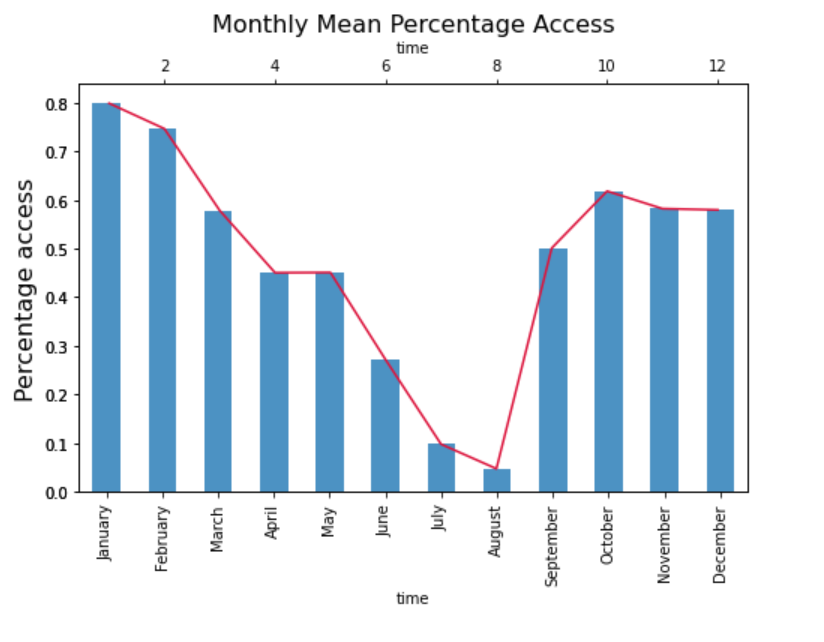

A grid is generated with the maximum possible size, which as a consequence leaves 2 empty graphics


In [ ]:
fig, axs = plt.subplots(nrows=(district_len//5)+1, ncols=5,figsize=(7*5, 7*(district_len//5)+1)) 
for i,v in enumerate(variables_names):
  row = i//5
  pos = i % 5
  axs[row][pos].set_title("District {}, Monthly Mean Percentage Access".format(v.split("_")[1]))
  axs[row][pos].set_ylabel('Percentage access', fontsize=16)
  globals()[v].groupby(by=[globals()[v].index.month])["pct_access"].mean().plot(kind="bar",ax = axs[row][pos], alpha = 0.8)
  #axs[row][pos].set_xticklabels(labels= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December'])

**Most consumed products**

In the cell below the most used products per month are selected as well as some details of districts that don't have specific monthly information.

In [ ]:
products_by_district = {}
errors_by_district = {}
for i,v in enumerate(variables_names):
  max_lp_id = {}
  errors = []
  gl_val = globals()[v]
  tmp_test_ds_gl = pd.DataFrame(gl_val.groupby(by=[gl_val.index.month,gl_val["lp_id"]])["pct_access"].mean())
  for j,vl in enumerate(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']):
    val = tmp_test_ds_gl.loc[tmp_test_ds_gl.index.get_level_values('time') == j+1]["pct_access"].nlargest(5)
    try:
      x_ticks = [int(k[1]) for k in val.index.values]
      max_lp_id[vl] = product_df["Product"].loc[product_df["ID"] == x_ticks[0]].values[0]
    except:
      errors.append(vl)
  products_by_district[v.split("_")[1]] = max_lp_id
  if errors:
    errors_by_district[v.split("_")[1]] = errors
  del max_lp_id,val,gl_val,tmp_test_ds_gl

We'll be seeing which of the products are the most consumed. For practical purposes a dayaframe is printed.


In [ ]:
final_count = {}
print("List of most used products:")
for i in products_by_district:
  for j,v in enumerate(products_by_district[i]):
    tmp_key = products_by_district[i][v]
    if tmp_key in final_count:
      final_count[tmp_key] += 1
    else:
      final_count[tmp_key] = 1
pd.DataFrame(data=products_by_district)


**The most used**

With the data above is difficult to elucidate the most used product so right after this list, a chart will be displyayed showing the behaviour of use.


In [ ]:
final_count

In the following chart we can see the majority of platforms listed as the most used only reached the category once, being Google Clasroom the absolute winner.

In [ ]:
tmp_final_count = pd.DataFrame.from_dict({"Platform":final_count.keys(),"Counts":final_count.values()})
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Platform", y="Counts", data=tmp_final_count)
plt.title("Platforms and use")
plt.xticks(rotation=90)

**Analyzing the use.** 

In order to get a better perspective on the previous chart we proceed to split the data into 2 segments.

Firstly, platfomrs with frequencies greater than the mean value are plot.

In [ ]:
tmp_final_count = pd.DataFrame.from_dict({"Platform":final_count.keys(),"Counts":final_count.values()})
tmp_final_count = tmp_final_count.loc[tmp_final_count["Counts"]>tmp_final_count["Counts"].mean()]
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Platform", y="Counts", data=tmp_final_count)
plt.title("Platforms and use")
plt.xticks(rotation=90)

Secondly, platforms with frequencies less than the mean value are plot.

In [ ]:
tmp_final_count = pd.DataFrame.from_dict({"Platform":final_count.keys(),"Counts":final_count.values()})
tmp_final_count = tmp_final_count.loc[tmp_final_count["Counts"]<tmp_final_count["Counts"].mean()]
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Platform", y="Counts", data=tmp_final_count)
plt.title("Platforms and use")
plt.xticks(rotation=90)

If we analyze the previous charts and information we can see:

- From the 372 original products only 67 can be considered as "the most used", meaning 18.1% of them.

- From the 372 original products only 8 of them are over "the most used"
mean value, meaning 2.15%.

It can be concluded that one of the best ways to take advantage of online lessons is by simplifying the number of tools, focusing the atention in those which offer the greatest benefits so it increases utilization by the students.


**Exploitation**

To finish this research and analysis it is necesary to remember that we have a set of districts with no information.

Regarding those district that might be not well used, a specific anlysis will be performed.


In [ ]:
final_error_count = {}
for i in errors_by_district:
  print("-"*20,end="\n")
  print("District {}".format(i),end="\n")
  final_error_count[i] = len(errors_by_district[i])
  for j,v in enumerate(errors_by_district[i]):
    print("{}|".format(v),end="")
    if j == 5:
      print("\n")
  print(end="\n")

In the following plot we can see all districts with missing information as well as how many months they are (with loss info).

In [ ]:
tmp_final_count = pd.DataFrame.from_dict({"District":final_error_count.keys(),"Counts":final_error_count.values()})
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="District", y="Counts", data=tmp_final_count)
plt.title("Districts missing information")
plt.xticks(rotation=90)

It is easy to observe that from the 59 districts with missing information it turns out that they are only missing one so districts with 5 or more months with no information will be displayed.


In [ ]:
tmp_final_count = pd.DataFrame.from_dict({"District":final_error_count.keys(),"Counts":final_error_count.values()})
tmp_final_count = tmp_final_count.loc[tmp_final_count["Counts"] >=5]
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="District", y="Counts", data=tmp_final_count)
plt.title("Districts missing information")
plt.xticks(rotation=90)

From the previous chart is derived:

- 13 out of the 59 districts with missing information have between 5 and 11 missing  months.

- Distric with ID 7970 is the one with more missing information, 11 months.

- 25% of 233 districts have missing information.

- 5.58% of 233 districts hace 5 or more months with missing information.



**States**

As the final step on the present analysis we must know the states whose districts have missing information, what type of comunity it is and what is the *Per-pupil total expenditure* range.


In [ ]:
tmp_final_count = pd.DataFrame.from_dict({"district_id":final_error_count.keys(),"Counts":final_error_count.values()})
tmp_final_count = tmp_final_count.astype({'district_id': 'int64'})

In [ ]:
missing_info_districts = pd.merge(tmp_final_count, district_general_df, on="district_id")
missing_info_districts.head()

In the following chart we see the distribution of states and locations where the missing information is.

Ohio is the state with the most missing information (chart on the left).

Regarding the *locale* (chart on the right), *Suburb* are the type wih the most missing information which might seem contradictory because at prior the types *town* or *rural* should be the one with the least information. However, if we consider the number of suburbs versus the number of towns or isolated locations it might seem obvious to say that the more information we've got from one type, the more probable it is we've got more missing values. 


In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20, 7)) 
ax1.set_title("Count Missing Information by State")
ax1.set_xlabel('Counting', fontsize=16)
missing_info_districts.groupby('state')['district_id'].nunique().plot(kind="bar",ax=ax1)
ax2.set_title("Count Missing Information by locale")
ax2.set_xlabel('Counting', fontsize=16)
missing_info_districts.groupby('locale')['district_id'].nunique().plot(kind="bar",ax=ax2)


Counting the pp type *Per-pupil total expenditure* we observe that the majority of information is around the mean value of the minimum and maximum, what makes us think that those district with missing information on *Per-pupil total expenditure* also miss information on months and connections. There is a certain correlation between this type of data (missing values)

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20, 7)) 
ax1.set_title("PP-MIN in districsts with missing informations")
ax1.set_xlabel('Counting', fontsize=16)
missing_info_districts.groupby('pp-min')['district_id'].nunique().plot(kind="bar",ax=ax1)
ax2.set_title("PP-MAX in districsts with missing informations")
ax2.set_xlabel('Counting', fontsize=16)
missing_info_districts.groupby('pp-max')['district_id'].nunique().plot(kind="bar",ax=ax2)

# Conclusion

After all the tasks to clean and visualize the data we conclude: 

1. In general terms, districts tend to behave the same way regarding the use of the different products.
2. Districts seem to have a certain type of correlation on the missing data.
3. Missing data implies inconclusive analysis.
4. From the type products, Google Classroom is the one with the most users.
5. Although each district has its own data, all of them seem to hace a tendency in the data disribution/visualization.
6. For each district with no missing data the number of connections tends to be more stable in the second half of the year which coincides with the new academic year (September-December).


 The real and practical advantage of this informatic switch is still to determine due to the early times this new methodology is living. We will evetually see results when millions of students can be delivered to the society as formed people with capabilities to improving it.
